# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# 0) Dataset 🌮🥤

Nos basamos en el dataset de Kaggle: [Marketing Campaign](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign?select=marketing_campaign.csv).
<br>En `Retail Company Case.pdf` pueden ver las consignas de la prueba técnica completa. <br>[Fuente: ifood](https://github.com/ifood/ifood-data-analyst-case).

# 1) Cargamos los datos 📕

In [1]:
import pandas as pd
from funpymodeling.exploratory import status

In [2]:
# Para este caso nos interesa visualizar todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("data/marketing_campaign.csv", sep=';') 

In [4]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


*Nota:* si bien el valor defecto de sep en `read_csv` es la coma `,`. 
<br>Siempre lo hago explícito porque a veces los archivos vienen separados por punto y coma, u otro separador como tab. Es una buena práctica, y también aplica cuando graban archivos.

# 2) Preparación de la data 👀

In [5]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ID,0,0.000000,1,0.000446,2240,int64
1,Year_Birth,0,0.000000,0,0.000000,59,int64
2,Education,0,0.000000,0,0.000000,5,object
3,Marital_Status,0,0.000000,0,0.000000,8,object
4,Income,24,0.010714,0,0.000000,1974,float64
5,Kidhome,0,0.000000,1293,0.577232,3,int64
6,Teenhome,0,0.000000,1158,0.516964,3,int64
7,Dt_Customer,0,0.000000,0,0.000000,663,object
8,Recency,0,0.000000,28,0.012500,100,int64
9,MntWines,0,0.000000,13,0.005804,776,int64


Eliminar columnas innecesarias:

In [6]:
data = data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

Eliminar los valores NaN de la columna `Income`.
<br>Existen 24 elementos NaN de 2240 en total, que representa un 1.07%.
<br>Consideremos un valor muy pequeño que estamos dispuestos a perder.
<br>**También pueden discretizar, rellenar los valores faltantes y evaluar si mejora o no el modelo respecto a si se eliminan.**

In [7]:
data = data.dropna()
 
# Resetting the indices using df.reset_index()
data = data.reset_index(drop=True)

Obtener la edad en vez de `Year_Birth`

In [8]:
today = pd.to_datetime('today').normalize()

In [9]:
data["age"] = today.year - data["Year_Birth"]

Obtener días totales siendo clientes de ifood en vez de `Dt_Customer`

In [10]:
data["client_day"] = (today - pd.to_datetime(data["Dt_Customer"], format="%Y-%m-%d")).dt.days

Eliminar columnas ya no necesarias `Year_Birth` y `Dt_Customer`.

In [11]:
data = data.drop(['Year_Birth', 'Dt_Customer'], axis=1)

In [12]:
data.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,client_day
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,3878
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,3328
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,3527
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,3354
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,3376


Hacer un get dummies

In [13]:
data = pd.get_dummies(data)

Visualizar data acondicionada y preparada:

In [14]:
data.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,client_day,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,3878,False,False,True,False,False,False,False,False,False,True,False,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,3328,False,False,True,False,False,False,False,False,False,True,False,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,3527,False,False,True,False,False,False,False,False,False,False,True,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,3354,False,False,True,False,False,False,False,False,False,False,True,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,3376,False,False,False,False,True,False,False,False,True,False,False,False,False


In [15]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Income,0,0.0,0,0.000000,1974,float64
1,Kidhome,0,0.0,1283,0.578971,3,int64
2,Teenhome,0,0.0,1147,0.517599,3,int64
3,Recency,0,0.0,28,0.012635,100,int64
4,MntWines,0,0.0,13,0.005866,776,int64
5,MntFruits,0,0.0,395,0.178249,158,int64
6,MntMeatProducts,0,0.0,1,0.000451,554,int64
7,MntFishProducts,0,0.0,379,0.171029,182,int64
8,MntSweetProducts,0,0.0,413,0.186372,176,int64
9,MntGoldProds,0,0.0,61,0.027527,212,int64


# 3) Clasificación 🎯

## 3.1) Separación de X de Y, y luego TR de TS (rutina):

In [16]:
data_x = data.drop('Response', axis=1)
data_y = data['Response']

Nos quedamos solo con los valores del dataframe

In [17]:
data_x = data_x.values
data_y = data_y.values

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

## 3.2) Creación del modelo predictivo

In [19]:
from sklearn.ensemble import RandomForestClassifier 

# Creamos 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [20]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

## 3.3) Predicción de la clase y score

In [21]:
rf.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
pred_probs=rf.predict_proba(x_train)

In [23]:
pred_probs

array([[0.96833333, 0.03166667],
       [0.987     , 0.013     ],
       [0.988     , 0.012     ],
       ...,
       [0.99733333, 0.00266667],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [24]:
y_prob_tr=pred_probs[:,1]

In [25]:
y_prob_tr

array([0.03166667, 0.013     , 0.012     , ..., 0.00266667, 0.        ,
       0.        ])

Lo que sigue:
    
- Matriz de confusión (MC) default (con sklearn)
- MC con crosstab
- Cambiar el punto de corte y graficar la MC
- Comparar antes y después de MC
- Función para "encontrar" punto de corte
- Curva ROC

## 3.4) Matriz de confusión

In [26]:
# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay

Sino se los toma, actualicen la librería: `!pip install --upgrade scikit-learn`

Vamos a usar directamente el que grafica porque incluye la matriz original

### a) Valores absolutos:

In [27]:
import seaborn as sns

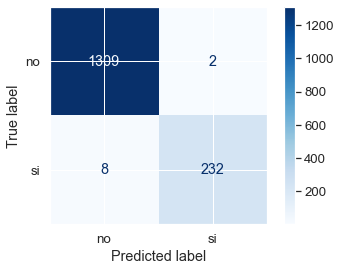

In [28]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    )

### b) Normalizando por fila:

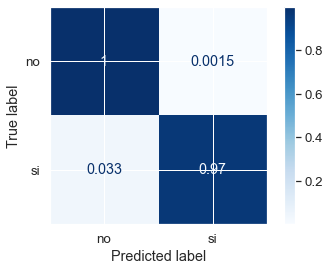

In [29]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

### c) No permite variar el punto de corte, entonces:

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

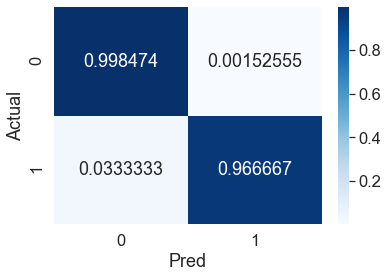

In [30]:
y_pred1=rf.predict(x_train)

sns.set(font_scale=1.5)                 # Ajuste tamaño de letra (var global)
conf_mat1=pd.crosstab(index=y_train,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g')

### d) Seteo del punto de corte

In [31]:
y_prob_tr

array([0.03166667, 0.013     , 0.012     , ..., 0.00266667, 0.        ,
       0.        ])

### ¡Importante! Elección de un punto de corte

La primer opción es un punto que sea mayor al promedio.

In [32]:
y_prob_tr.mean()

0.15651118863406094

Creamos el label 🦾

In [33]:
import numpy as np
np.where(y_prob_tr > 0.15, "si", "no")

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U2')

Lo asignamos...

In [34]:
y_pred2=np.where(y_prob_tr > 0.15, 1, 0)

In [35]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

### e) Matriz de confusión (punto de corte custom)

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

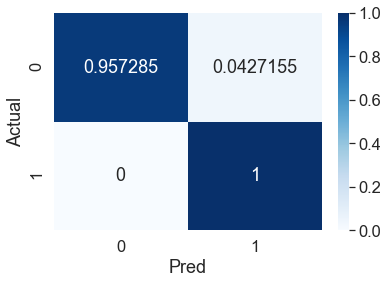

In [36]:
conf_mat2=pd.crosstab(index=y_train, 
                      columns=y_pred2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')

Comparando antes y después:

In [37]:
import matplotlib.pyplot as plt

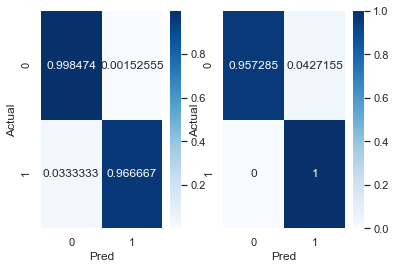

In [38]:
sns.set(font_scale=1)       # Ajuste tamaño de letra (var global)
fig, ax = plt.subplots(1,2)  

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g', ax=ax[0])
sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g', ax=ax[1])

fig.show(warn=False)

### f) Análisis de los distintos puntos de corte

**Nota:** Nunca elegir el punto de corte con los datos de testing

In [40]:
#!pip3 install yellowbrick

Esta celda resuelve la tarea pero con muchos warnings ☢️
```
from yellowbrick.classifier.threshold import discrimination_threshold

dis_res=discrimination_threshold(rf, x_train, y_train,)
dis_res
```

👆 Así que la vamos a actualizar por esta celda:

**Nota:** Esta celda toma algunos minutos, mientras tanto espera el resultado con un café o mate 😎

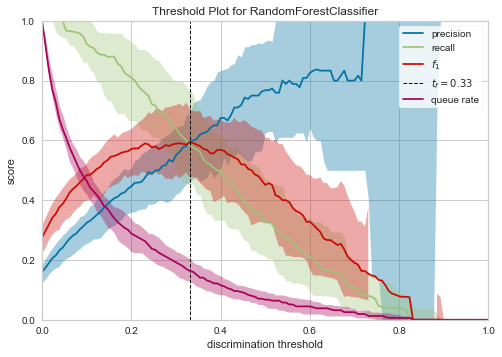

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [39]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(rf)

visualizer.fit(x_train, y_train)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura

### g) Curva ROC

Graficamos para training y para test

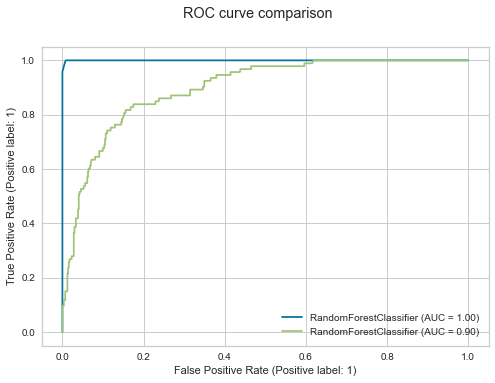

In [40]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

# 4) Regresión 🤑

### 4.1) Análisis exploratorio de datos (AED)

In [41]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Income,0,0.0,0,0.000000,1974,float64
1,Kidhome,0,0.0,1283,0.578971,3,int64
2,Teenhome,0,0.0,1147,0.517599,3,int64
3,Recency,0,0.0,28,0.012635,100,int64
4,MntWines,0,0.0,13,0.005866,776,int64
5,MntFruits,0,0.0,395,0.178249,158,int64
6,MntMeatProducts,0,0.0,1,0.000451,554,int64
7,MntFishProducts,0,0.0,379,0.171029,182,int64
8,MntSweetProducts,0,0.0,413,0.186372,176,int64
9,MntGoldProds,0,0.0,61,0.027527,212,int64


### 4.2) Separación TR/TS

In [42]:
data_x = data.drop('Income', axis=1)
data_y = data['Income']

Nos quedamos solo con los valores del dataframe

In [43]:
data_x = data_x.values
data_y = data_y.values

In [44]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

### 4.3) Creación del modelo de regresión lineal

In [45]:
from sklearn.linear_model import LinearRegression

# a.Creamos modelo
model = LinearRegression()

# b. fiteamos
model.fit(x_train, y_train)

# c. obtenemos predicciónes para tr y ts
pred_tr=model.predict(x_train)
pred_ts=model.predict(x_test)

In [46]:
pred_tr[0:5]

array([40874.96120209, 40288.93660624, 24590.6757569 , 27368.46315197,
       52380.77051817])

**Nota:** No hay parámetros

### 4.4) Creación del RF con hypertuning (usando grid search)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

model_rf = RandomForestRegressor()

In [48]:
params = {
    'n_estimators' : [500, 5000],
    'max_features': [50, 100],
}

grid_rf = GridSearchCV(estimator = model_rf,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5, 
                        verbose = 1)

Actualmente hay un conflicto de procesamiento en paralelo con GridSearchCV, por eso no se recomienda el uso de n_paralel.

Esta celda toma algunos minutos (aprox 10 min), mientras tanto espera el resultado con un café o mate 😎

In [49]:
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [50, 100],
                         'n_estimators': [500, 5000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [50]:
grid_rf.best_estimator_

RandomForestRegressor(max_features=50, n_estimators=5000)

Predicción de casos nuevos:

In [51]:
grid_rf.predict(x_train)
grid_rf.predict(x_test)

array([ 58562.185 ,  42713.4032,  24087.2584,  71752.8254,  75986.7608,
        47392.4184,  29207.3082,  55670.4934,  50580.4454,  49050.591 ,
        28295.9444,  58847.0434,  30725.823 ,  36717.3296,  81829.9964,
        81571.83  ,  33206.0612,  36281.0446,  25072.965 ,  26068.2578,
        33799.054 ,  78527.6988,  29263.625 ,  31918.2918,  62425.228 ,
        82558.7612,  80087.8922,  31687.116 ,  63006.1716,  22776.7762,
        26593.2208,  66265.325 ,  49916.3202,  44350.5116,  52853.2498,
        79286.0716,  56710.523 ,  74271.5714,  53688.213 ,  27860.4838,
        41991.6002,  64224.1106,  28648.1222,  52364.034 ,  49285.8756,
        73920.9364,  58353.1028,  54842.4684,  41167.2296,  49450.8224,
        65752.6522,  46067.2506,  79126.1634,  65163.5216,  79605.7714,
        75900.0658,  40417.4982,  56191.6318,  24353.1674,  68352.7956,
        37351.1954,  52018.8686,  36561.652 ,  40409.0078,  29634.103 ,
        57812.1564,  43679.3664,  77717.878 ,  29955.9816,  5251

### 4.5) Análisis de las métricas de error

**NOTA:** neg_mean_absolute_error más cercano a 0 es mucho mejor.

In [52]:
pd.concat([pd.DataFrame(grid_rf.cv_results_["params"]),
           pd.DataFrame(grid_rf.cv_results_["mean_test_score"], 
                        columns=["neg_mean_absolute_error"])],axis=1).sort_values('neg_mean_absolute_error', ascending=False)

,max_features,n_estimators,neg_mean_absolute_error
1,50,5000,-6864.370858
0,50,500,-6877.579996
3,100,5000,-6877.592653
2,100,500,-6976.484211


Análisis métrica TR vs TS:

In [53]:
grid_rf.score(x_train, y_train)

-2398.7404724693747

In [54]:
grid_rf.score(x_test, y_test)

-5887.723622255639

Links útiles:

- Para investigar más de `gridsearch`: [Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74).
- Doc oficial [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

### 4.6) Gráfico de la curva del error

**Gráfico de prediction error**

- Linea gris: Lo que nos gustaría que fuera
- Linea negra: El ajuste de regresión, de la regresión misma

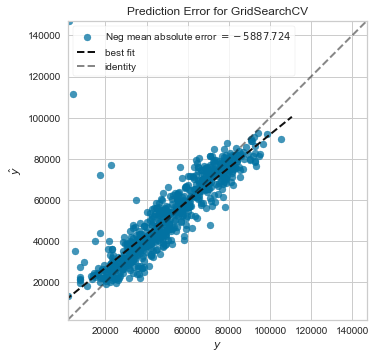

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [55]:
from yellowbrick.regressor import PredictionError

vis_pred_err = PredictionError(grid_rf)

vis_pred_err.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_pred_err.score(x_test, y_test)  # Calculamos las métricas para test
vis_pred_err.show()                 # Visualizamos!

**Gráfico de residuos**

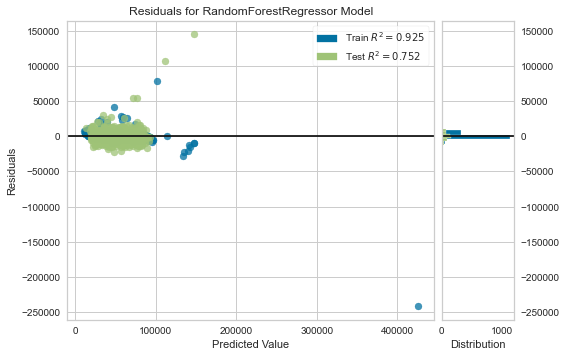

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [56]:
from yellowbrick.regressor import ResidualsPlot

# ojo: poner best_estimator_
vis_res = ResidualsPlot(grid_rf.best_estimator_)


# Copy-paste de la doc oficial: 
vis_res.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res.score(x_test, y_test)  # Calculamos las métricas para test
vis_res.show()                 # Visualizamos!

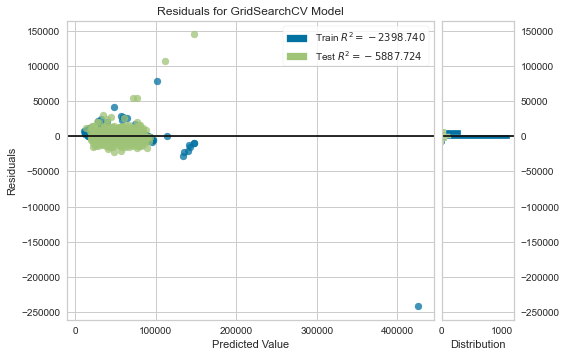

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [57]:
vis_res2 = ResidualsPlot(grid_rf)

# Copy-paste de la doc oficial: https://www.scikit-yb.org/en/latest/quickstart.html
vis_res2.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res2.score(x_test, y_test)  # Calculamos las métricas para test
vis_res2.show()                 # Visualizamos!

Doc oficial: https://www.scikit-yb.org/en/latest/quickstart.html

# 5) Guardar un modelo

Vamos a guardar el modelo de clasificación

In [36]:
import pickle

In [37]:
# Guardar en el disco
filename = 'rf.pkl'
pickle.dump(rf, open(filename, 'wb')) # rf = nuestro modelo

In [38]:
# Lo cargamos para usarlo en otro momento. 
rf_loaded = pickle.load(open(filename, 'rb'))